In [1]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob

In [2]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files')

site_info = pd.read_csv('station_info.csv')

site = pd.read_csv('site_daily.csv')


In [3]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------

locs = site_info[['item', 'name']].drop_duplicates()

site_names = pd.merge(site, locs, on=['item'])

n = len(locs)

In [4]:
n

21

In [7]:
#--------------------------------------------------------------------------
# DROP CRAZY OUTLIERS
#--------------------------------------------------------------------------

site_names.drop(site_names[(site_names['Ozone_avg'] <= 3) & (site_names['scaled_day'] <= -8)].index, inplace=True)
site_names.dropna(inplace=True)

In [8]:
#--------------------------------------------------------------------------
# COUNT TOTAL DATA PER MONTH
#--------------------------------------------------------------------------

total_days_site = site_names.groupby(['name','Month'])['Day'].count().reset_index()

total_days_site.rename(columns = {'Day': 'count'}, inplace=True)


In [9]:
#--------------------------------------------------------------------------
# DROP STUFF
#--------------------------------------------------------------------------

select_data = total_days_site[(total_days_site['name'] != 'Rio Branco') & (total_days_site['name'] != 'Mt. Kenya')
                        & (total_days_site['name'] != 'Tanah Rata') & (total_days_site['name'] != 'Danum')]


names = select_data['name'].drop_duplicates().values

n = len(names)

In [14]:
chose_order = ['Amazonas', 'Porto Velho', 'Santarem', 'Congo', 'Bukit Koto', 'Watukosek',  'Daintree', 'Panama',
               'Bogota','San Lorenzo', 'Sao Paulo', 'Jakarta', 'Darwin' ]

In [15]:
letter_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)','(j)', '(k)', '(l)', '(m)']

months = ['J','F','M','A','M','J','J','A','S','O','N','D']

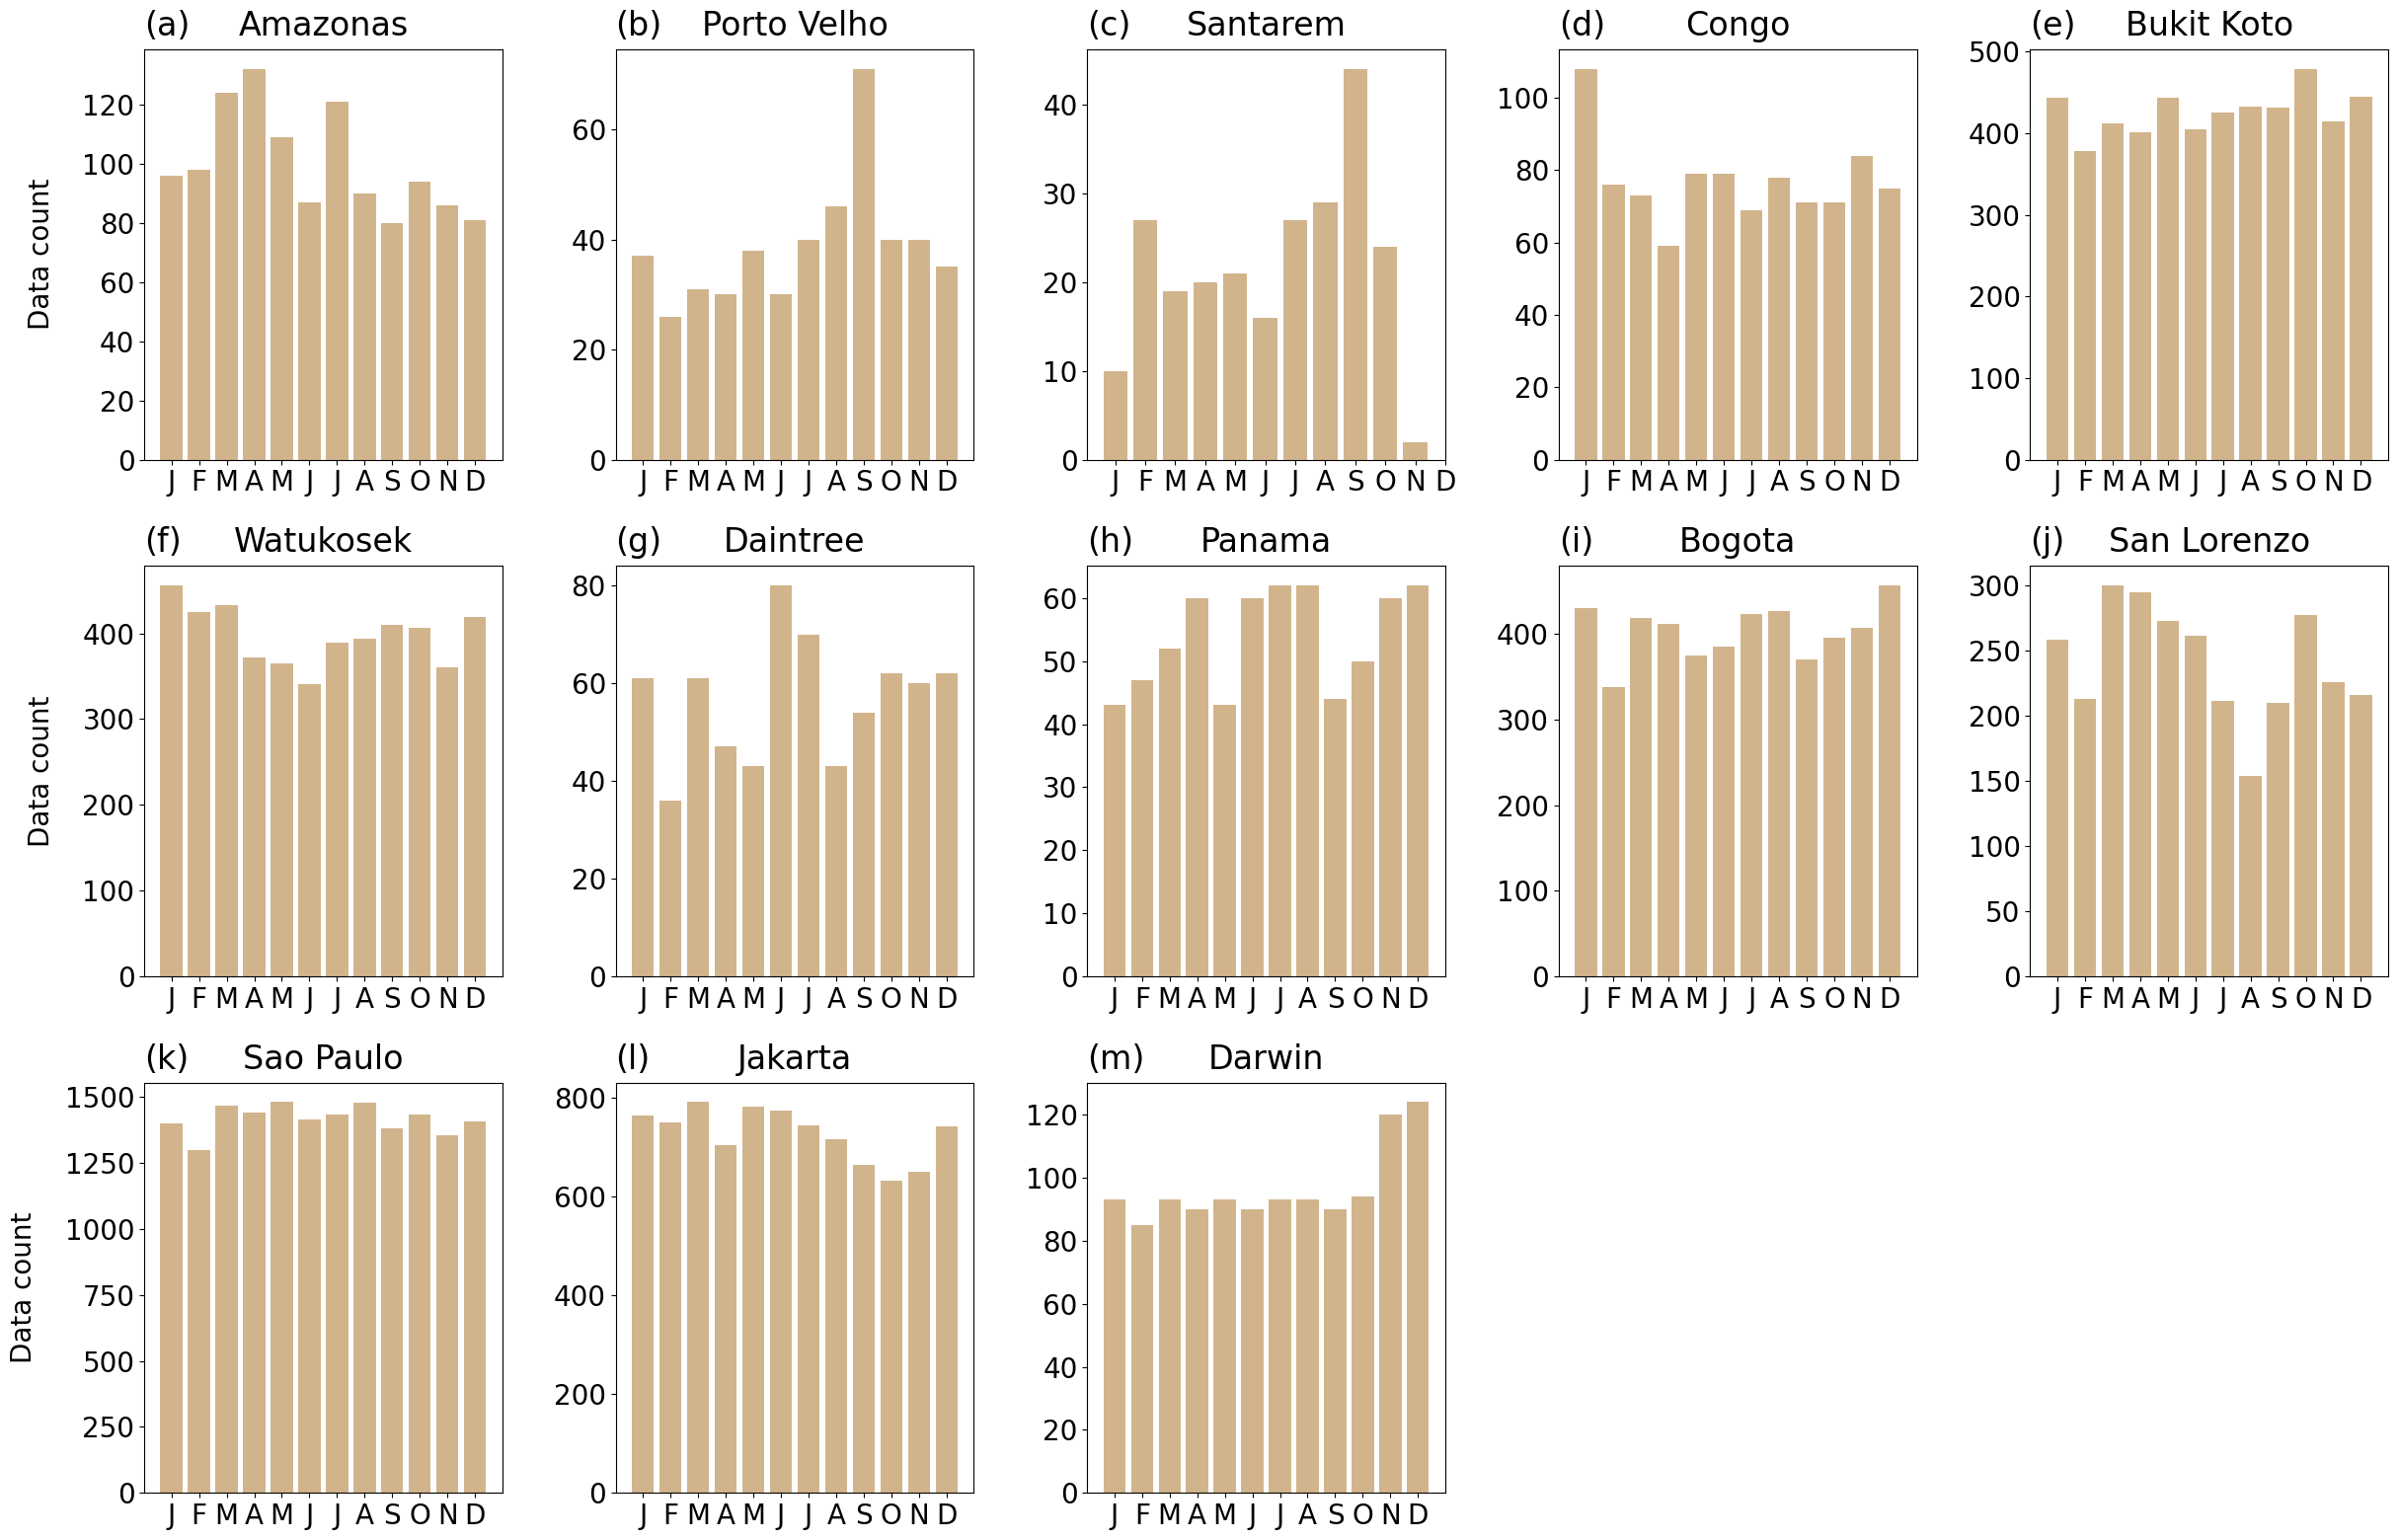

In [17]:
fig, axs = plt.subplots(3,5,figsize=(25,16))    

plt.rcParams['font.size']=20

ax = axs.ravel()

for i in range(n):

    count_df = select_data[select_data['name'] == chose_order[i]]
        
#------------------------------------------- plot  count----------------------------------    
    
    ax[i].bar(count_df.Month, count_df['count'], color='tan')
    
#------------------------------------------- aes---------------------------------- 
    
    ax[i].set_xticks(range(1,13))
    ax[i].set_xticklabels(months)
    
    ax[i].set_title(chose_order[i])
    ax[i].set_title(letter_labels[i], loc='left', pad=10)

for i in range(0,15,5):
        ax[i].set_ylabel('Data count', size=20, labelpad=20)

plt.tight_layout()

fig.delaxes(ax[-1])
fig.delaxes(ax[-2])

plt.savefig('figures/data_count.png', dpi=500)